# Exam 17th of January 2025, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [1]:
# Insert your anonymous exam ID as a string in the variable below
examID=""


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


---
## Exam vB, PROBLEM 1
Maximum Points = 14


This problem is about SVD and anomaly detection. In all the problems where you are asked to produce a matrix or vector, they should be **numpy arrays**. 

1. [4p] Load the file `data/SVD.csv` as instructed in the code cell. Compute the Singular Value Decomposition, i.e. construct the three matrices $U$, $D$, $V$ such that if $X$ is the data matrix of shape `n_samples x n_dimensions` then $X = UDV^T$. Put the resulting matrices in their variables, check that the shapes align with the instructions in the code cell. Finally, extract the first right and left singular vectors and store those as 1-d arrays in the instructed variables.
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition. Calculate the explained variance of using $1$, $2$,... number of singular vectors and select how many singular vectors are needed in order to explain at least $95\%$ of the variance.
3. [3p] With the number of components chosen in part 2, construct the best approximating matrix with the rank as the number of components. Explain what each row represents in the approximating matrix in terms of the original data, write your answer as free text in the Markdown cell below as instructed in the cells.
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the original matrix `problem1_data`and the approximating matrix `problem1_approximation` and plot the empirical distribution function of that distance. Based on the empirical distribution function choose a threshold such that 10 samples are above it and the rest below. Store the 10 samples in the instructed variable.

-----
This problem is about SVD and anomaly detection. In all the problems where you are asked to produce a matrix or vector, they should be **numpy arrays**. 

1. [4p] Load the file `data/SVD.csv` as instructed in the code cell. Compute the Singular Value Decomposition, i.e. construct the three matrices $U$, $D$, $V$ such that if $X$ is the data matrix of shape `n_samples x n_dimensions` then $X = UDV^T$. Put the resulting matrices in their variables, check that the shapes align with the instructions in the code cell. Finally, extract the first right and left singular vectors and store those as 1-d arrays in the instructed variables.
-----

In [3]:
# Part 1: 4 points
#from scipy.linalg import svd
# Load the data from the file data/SVD.csv and store the data in a numpy array called problem1_data below
# Double check that the numbers have been parsed correctly by checking the dtype of the array by calling problem1_data.dtype
problem1_data = pd.read_csv("data/SVD.csv", header=None).to_numpy()
print(problem1_data)

U, singular, V_transpose = np.linalg.svd(problem1_data, full_matrices=False)
print("This is S shape: ", singular.shape)
print("This is problem1_data shape: ", problem1_data.shape)
# The matrix of left singular vectors of problem1_data with shape n_samples x n_dimensions
problem1_U = U
print("shape of U: ", problem1_U.shape)

# The vector of singular values of problem1_data with shape n_dimensions
problem1_D = np.diag(singular)
print("Problem D: ", problem1_D.shape)

# The matrix of right singular vectors of problem1_data with shape n_dimensions x n_dimensions
problem1_V = V_transpose.T
print("Shape of V: ", problem1_V.shape)
# The first right singular vector of problem1_data with shape (n_dimensions,)
# hint sometimes one needs to invoke flatten() to avoid having shape (n_dimensions, 1) or (1, n_dimensions)
problem1_first_right_singular_vector = problem1_V[:,0]

# The first left singular vector of problem1_data with shape (n_samples,)
# hint sometimes one needs to invoke flatten() to avoid having shape (n_samples, 1) or (1, n_samples)
problem1_first_left_singular_vector = problem1_U[:,0]

print(f"Shape of Right singular vectors: {problem1_first_right_singular_vector.shape} \nShape of Left singular vectors: {problem1_first_left_singular_vector.shape}")


X = problem1_U @ problem1_D @ problem1_V.T
print("This is X shape: ", X.shape)

[[ 5.82928529  1.92516658 -0.91619893 ...  0.56108869 -3.38597085
   0.92960379]
 [ 6.91782733  0.63977577  1.96675261 ... -0.91585336  1.32995316
   0.72219922]
 [ 1.60971035  1.55427019 -2.88713487 ... -0.31795049  1.45741735
  -1.87519949]
 ...
 [ 2.4165613  -2.75490801  1.58021092 ...  1.917514    5.26588172
  -3.13133213]
 [ 2.38972793 -2.0181201   2.54772955 ...  0.14920327 -0.69941418
   1.56079111]
 [-8.72359448 -0.67700276  0.064274   ...  2.76662698 -1.88755849
  -0.21442579]]
This is S shape:  (100,)
This is problem1_data shape:  (1010, 100)
shape of U:  (1010, 100)
Problem D:  (100, 100)
Shape of V:  (100, 100)
Shape of Right singular vectors: (100,) 
Shape of Left singular vectors: (1010,)
This is X shape:  (1010, 100)


-----
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition. Calculate the explained variance of using $1$, $2$,... number of singular vectors and select how many singular vectors are needed in order to explain at least $95\%$ of the variance.
-----

In [4]:
# Part 2: 3 points

# Calculate the explained variance of using 1,2,3,...,n_dimensions singular values and store it as a numpy array called
# problem1_explained_variance below
# A numpy array of shape (n_dimensions,), it should be an increasing sequence of positive numbers
# and the last element should be 1

s_squared = singular ** 2

# Cumulative explained variance:
# np.cumsum(explained_variances) = fraction explained by the first k components.
# This is used to answer: “How many components do I need to explain 90% / 95% of the variance?”
problem1_explained_variance = np.cumsum(s_squared) / np.sum(s_squared)
print(f"This is explained variance: {problem1_explained_variance}")

# Store in the variable below the smallest number of singular values needed
# to explain at least 95% of the variance
problem1_num_components = np.argmax(problem1_explained_variance >= 0.95) + 1
print("Number of components: ", problem1_num_components)


This is explained variance: [0.16233339 0.31142268 0.42750646 0.5345299  0.63093263 0.72663179
 0.80394305 0.87633669 0.94444296 0.99907483 0.99923126 0.99935627
 0.99947819 0.99958185 0.99966931 0.99975142 0.99982953 0.99989362
 0.99994861 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1. 

-----
3. [3p] With the number of components chosen in part 2, construct the best approximating matrix with the rank as the number of components. Explain what each row represents in the approximating matrix in terms of the original data, write your answer as free text in the Markdown cell below as instructed in the cells.
-----

In [5]:
# Part 3: 3 points

# Calculate the approximating matrix of problem1_data using the first 
# problem1_num_components singular values and store it in the variable below
# A numpy array of shape n_samples x n_dimensions

k = problem1_num_components

X = problem1_U[:, :k] @ problem1_D[:k, :k] @ problem1_V.T[:k, :]

print("This is X shape, ", X.shape)

problem1_approximation = X


This is X shape,  (1010, 100)



## Free text answer

Put the explanation for **part 3** of the rows of the approximating matrix below this line in this cell. In order to enter edit mode you can doubleclick this cell or select it and just press enter.

I looked at wikipedia and old posts stack overflow to solve the problem. What does each row represent in the matrix? Each row represents the results of a multiplication between right and left singular vector values with singular values.

-----
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the original matrix `problem1_data`and the approximating matrix `problem1_approximation` and plot the empirical distribution function of that distance. Based on the empirical distribution function choose a threshold such that 10 samples are above it and the rest below. Store the 10 samples in the instructed variable.
-----

Shape of Dist:  (1010,)


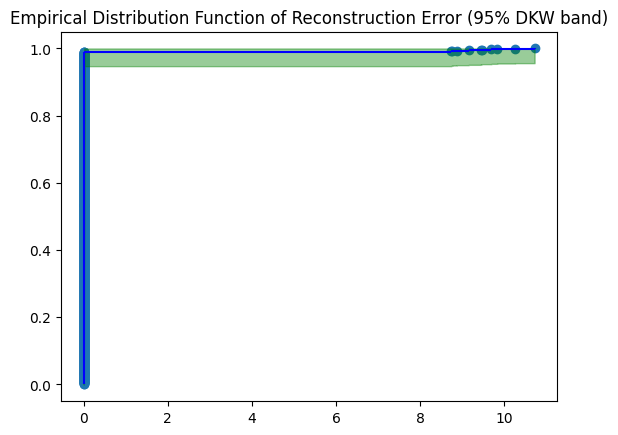

Selected threshold: 4.382758304950724
Number of samples above threshold: 10
Outliers shape: (10, 100)


In [16]:
# Part 4: 4 points

# Calculate the reconstruction error of problem1_data using problem1_approximation
# (row-wise Euclidean distance)
# Should have shape (n_samples,)

original = problem1_data
approximation = problem1_approximation

# distance = np.linalg.norm(original - approximation)

# print("Shape of distance: ", distance.shape)

#print(original[0])
dist = []
for i in range(original.shape[0]):
    
    d = np.linalg.norm(original[i] - approximation[i])
    dist.append(d)
    
dist = np.array(dist)

print("Shape of Dist: ", dist.shape)


problem1_reconstruction_error = dist

#problem1_reconstruction_error = np.linalg.norm(original - approximation, axis=1)

# Put the code below to plot the empirical distribution function
# XXX
# XXX
# XXX
# 2) Build and plot empirical distribution function (EDF)
edf_residuals = makeEDF(problem1_reconstruction_error)

plotEDF(
    edf_residuals,
    confidence_band=True,
    alpha=0.95,
    title="Empirical Distribution Function of Reconstruction Error (95% DKW band)"
)

# 3) Choose threshold so that EXACTLY 10 samples are strictly above it
sorted_desc = np.sort(problem1_reconstruction_error)[::-1]

problem1_threshold = 0.5 * (sorted_desc[9] + sorted_desc[10])

print("Selected threshold:", problem1_threshold)

# 4) Store the 10 samples ABOVE the threshold
mask = problem1_reconstruction_error > problem1_threshold
problem1_outliers = problem1_data[mask]

# 5) Sanity checks (printed, as requested)
print("Number of samples above threshold:",
      np.sum(mask))

print("Outliers shape:",
      problem1_outliers.shape)


---
## Exam vB, PROBLEM 2
Maximum Points = 14


In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.
2. [4p] A page loads in $\text{Exp}(1)$ (Exponentially distributed with mean $1$) seconds if not preloaded and loads with $\text{Exp}(10)$ (Exponentially distributed with mean $1/10$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $1$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.
3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).
4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to it. 

In [ ]:
# Part 1: 3 points

# Load the data from the file data/websites.csv and estimate the transition matrix of the Markov chain
# Store the estimated transition matrix in the variable problem2_transition_matrix below
# A numpy array of shape (problem2_n_states, problem2_n_states)

data = 

problem2_transition_matrix = XXX

# Store the number of states in the variable problem2_n_states below
problem2_n_states = XXX


NameError: name 'XXX' is not defined

In [ ]:
# Part 2: 4 points

# Simulate the website load times for the next page of 10000 users that are currently on page 1
# (recall indexing starts at 0) when we only load the most likely page.
# Store the simulated page load times in the variable below
# A numpy array of shape (10000,)
problem2_page_load_times_top = XXX

# Repeat the simulation of load times for the next page of 10000 users that are currently on page 1
# when we load the two most likely pages.
# Store the simulated page load times in the variable below
# A numpy array of shape (10000,)
problem2_page_load_times_two = XXX


In [ ]:
# Part 3: 3 points

# Calculate the true expected load time for loading a page without pre-loading
# the next page and store it in the variable below
# A float
problem2_avg = XXX

# Is the average load time for loading a page without pre-loading the next page
# larger than the average load time for loading a page after pre-loading
# the next most likely page?
# True / False
problem2_comparison = XXX



## Free text answer

Put the explanation for **part 3** of how you made the decision about `problem2_comparison` below this line in this **cell**. In order to enter edit mode you can doubleclick this cell or select it and press enter.



In [ ]:
# Part 4: 4 points

# Begin by calculating the stationary distribution of the Markov chain and store it in the variable below
# WARNING: Since the transition matrix is not symmetric, numpy might make the output of the eigenvectors complex,
# you can use np.real() to get the real part of the eigenvectors
# A numpy array of shape (problem2_n_states,)
problem2_stationary_distribution = XXX

# Now use the above stationary distribution to calculate the average load time for loading a page
# after pre-loading the next most likely page according to the stationary distribution
# Store the average load time in the variable below
# A float
problem2_avg_stationary = XXX


---
## Exam vB, PROBLEM 3
Maximum Points = 12


In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.
2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.
3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.
3. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.

In [17]:

# RUN THIS CELL TO GET THE DATA

# We start by loading the data

import pandas as pd

PROBLEM3_DF = pd.read_csv('data/fraud.csv')
Y = PROBLEM3_DF['Class'].values
X = PROBLEM3_DF[['V%d' % i for i in range(1,5)]+['Amount']].values

# We will split the data into training, testing and validation sets
from Utils import train_test_validation
PROBLEM3_X_train, PROBLEM3_X_test, PROBLEM3_X_val, PROBLEM3_y_train, PROBLEM3_y_test, PROBLEM3_y_val = train_test_validation(X,Y,shuffle=True,random_state=1)

# From this we will train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(PROBLEM3_X_train,PROBLEM3_y_train)

# THE FOLLOWING CODE WILL PRODUCE THE ARRAYS YOU NEED FOR THE PROBLEM

PROBLEM3_y_pred_proba_val = lr.predict_proba(PROBLEM3_X_val)[:,1]
PROBLEM3_y_true_val = PROBLEM3_y_val

PROBLEM3_y_pred_proba_test = lr.predict_proba(PROBLEM3_X_test)[:,1]
PROBLEM3_y_true_test = PROBLEM3_y_test


In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.


In [ ]:
# Part 1: 3 points

# Implement the following function that calculates the cost of a binary classifier according to
# the specification in the problem statement
# See the comments inside the function for details of the parameters
def cost(y_true, y_predict_proba, threshold):
    # y_true is a numpy array of shape (n_samples,) with binary labels
    # y_predict_proba is a numpy array of shape (n_samples,) with predicted probabilities
    # threshold is a float between 0 and 1

    # When returning the cost, you should return the average cost per sample
    # thus it should be a value
    y_pred = (y_predict_proba >= threshold)
    
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    # True Negatives: legitimate transactions correctly allowed
    TN = np.sum((y_true == 0) & (y_pred == 0))
    
    # False Positives: legitimate transactions incorrectly blocked
    FP = np.sum((y_true == 0) & (y_pred == 1))
    
    # False Negatives: fraud that was missed
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    tp_cost = 100
    tn_cost = 0
    fp_cost = 120
    fn_cost = 600
    return ((TP * tp_cost) + (TN * tn_cost) + (FP * fp_cost) + (FN * fn_cost)) // len(y_true)

# Provide the code below to plot the cost as a function of the threshold
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# The plot should be between 0 and 1 with 0.01 increments
# The y-axis should be the cost and the x-axis should be the threshold

thresholds = np.arange(0, 1, 0.01)
    
plt.plt()

2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.


In [ ]:
# Part 2: 2.5 points

# Use the cost function you just implemented above to find the threshold that minimizes the cost
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the threshold in the variable below
problem3_threshold = XXX  # A float between 0 and 1

# Now calculate the cost of the classifier using the validation data and the threshold you just found
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the cost in the variable below
problem3_cost_val = XXX  # A float

# Using the threshold you just found, calculate the predicted labels of the classifier
# on the validation data and put the predicted labels in the variable below
# A numpy array of shape (n_samples,) with values 0 or 1
problem3_y_pred_val = XXX

# Calculate the precision and recall of the classifier of class 1 using the threshold you just found
# Store in the variables below (floats between 0 and 1)
problem3_precision_1 = XXX
problem3_recall_1 = XXX

# Calculate the precision and recall of the classifier of class 0 using the threshold you just found
# Store in the variables below (floats between 0 and 1)
problem3_precision_0 = XXX
problem3_recall_0 = XXX


3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.


In [ ]:
# Part 3: 2.5 points

# Find the threshold that minimizes the 0-1 loss using the validation data
# specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the threshold in the variable below
# A float between 0 and 1
problem3_threshold_01 = XXX

# Now calculate the difference in cost (using the cost function you implemented in Part 1)
# between the optimal threshold chosen in Part 2 and the one chosen in this part.
# The value should be positive.
# A float
problem3_cost_difference = XXX


4. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.

In [ ]:
# Part 4: 4 points

# Using the threshold problem3_threshold use Hoeffding's inequality to provide a confidence interval
# for the cost of the classifier with 95 % confidence using the test data.
# Specifically the arrays PROBLEM3_y_true_test and PROBLEM3_y_pred_proba_test.
# Store the lower and upper bounds of the confidence interval in the variables below

problem3_lower_bound = XXX  # A float
problem3_upper_bound = XXX  # A float



## Free text answer

Put your explanation for part 4 below this line in this **cell**. Doubleclick to enter edit mode as before.


I assume that all variables are sub-Gaussian, to be able to use Hoeffdinger's inequality. 
I furthermore assume that the variables X are IID.